In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

## 1. Load data

In [3]:
df1 = pd.read_csv('data/Task 1 (B2018)/modeling_data_Task1_wpreds.csv')
df2 = pd.read_csv('data/Task 2 (V2023)/modeling_data_Task2_wpreds.csv')
df3 = pd.read_csv('data/Task 3 (HW2023a)/modeling_data_Task3_wpreds.csv')
df4 = pd.read_csv('data/Task 4 (BP2023)/modeling_data_Task4_wpreds.csv')
df5 = pd.read_csv('data/Task 5 (HW2023b)/modeling_data_Task5_wpreds.csv')

Number of valid observations

In [4]:
# Define a custom function to count rows without -99
def count_valid_rows(group):
    return group[group['choice_idx'] != -99].shape[0]

In [5]:
n_valid1 = df1.groupby(['condition','model']).apply(count_valid_rows)
n_valid2 = df2.groupby(['condition','model']).apply(count_valid_rows)
n_valid3 = df3.groupby(['condition','model']).apply(count_valid_rows)
n_valid4 = df4.groupby(['condition','model']).apply(count_valid_rows)
n_valid5 = df5.groupby(['condition','model']).apply(count_valid_rows)

## 2. Learning phase accuracy

Subset the learning phase data (removing invalid observations)

In [12]:
df1_learning = df1.loc[(df1['choice_idx'] != -99) & (df1['context'] != 99)]
df2_learning = df2.loc[(df2['choice_idx'] != -99) & (df2['context'] != 99)]
df3_learning = df3.loc[(df3['choice_idx'] != -99) & (df3['context'] != 99)]
df4_learning = df4.loc[(df4['choice_idx'] != -99) & (df4['context'] != 99)]
df5_learning = df5.loc[(df5['choice_idx'] != -99) & (df5['context'] != 99)]

Calculate proportion of correct choices for each simulation run.

Then, calculate the mean for each condition and LLM.

In [13]:
df1_learning_acc = df1_learning.groupby(['condition', 'model', 'id'])['accuracy'].mean().groupby(['condition','model']).mean()
df2_learning_acc = df2_learning.groupby(['condition', 'model', 'id'])['accuracy'].mean().groupby(['condition','model']).mean()
df3_learning_acc = df3_learning.groupby(['condition', 'model', 'id'])['accuracy'].mean().groupby(['condition','model']).mean()
df4_learning_acc = df4_learning.groupby(['condition', 'model', 'id'])['accuracy'].mean().groupby(['condition','model']).mean()
df5_learning_acc = df5_learning.groupby(['condition', 'model', 'id'])['accuracy'].mean().groupby(['condition','model']).mean()

Standard prompt

In [16]:
standard_learning_acc = np.concatenate((
    df1_learning_acc['standard prompt'].to_numpy(),
    df2_learning_acc['standard prompt'].to_numpy(),
    df3_learning_acc['standard prompt'].to_numpy(),
    df4_learning_acc['standard prompt'].to_numpy(),
    df5_learning_acc['standard prompt'].to_numpy()
))

Comparisons prompt

In [17]:
comparisons_learning_acc = np.concatenate((
    df1_learning_acc['comparisons prompt'].to_numpy(),
    df2_learning_acc['comparisons prompt'].to_numpy(),
    df3_learning_acc['comparisons prompt'].to_numpy(),
    df4_learning_acc['comparisons prompt'].to_numpy(),
    df5_learning_acc['comparisons prompt'].to_numpy()
))

## 3. Transfer phase accuracy

Subset the transfer phase data (removing invalid observations)

In [18]:
df1_transfer = df1.loc[(df1['choice_idx'] != -99) & (df1['context'] == 99)]
df2_transfer = df2.loc[(df2['choice_idx'] != -99) & (df2['context'] == 99)]
df3_transfer = df3.loc[(df3['choice_idx'] != -99) & (df3['context'] == 99)]
# for Bavard & Palminteri (2023) task, only analyze transfer choices where the EVs differ
df4_transfer = df4.loc[(df4['choice_idx'] != -99) & (df4['context'] == 99) & (df4['left_ABS'] != df4['right_ABS'])]
df5_transfer = df5.loc[(df5['choice_idx'] != -99) & (df5['context'] == 99)]

Calculate proportion of correct choices for each simulation run.

Then, calculate the mean for each condition and LLM.

In [19]:
df1_transfer_acc = df1_transfer.groupby(['condition', 'model', 'id'])['accuracy'].mean().groupby(['condition','model']).mean()
df2_transfer_acc = df2_transfer.groupby(['condition', 'model', 'id'])['accuracy'].mean().groupby(['condition','model']).mean()
df3_transfer_acc = df3_transfer.groupby(['condition', 'model', 'id'])['accuracy'].mean().groupby(['condition','model']).mean()
df4_transfer_acc = df4_transfer.groupby(['condition', 'model', 'id'])['accuracy'].mean().groupby(['condition','model']).mean()
df5_transfer_acc = df5_transfer.groupby(['condition', 'model', 'id'])['accuracy'].mean().groupby(['condition','model']).mean()

Standard prompt

In [20]:
standard_transfer_acc = np.concatenate((
    df1_transfer_acc['standard prompt'].to_numpy(),
    df2_transfer_acc['standard prompt'].to_numpy(),
    df3_transfer_acc['standard prompt'].to_numpy(),
    df4_transfer_acc['standard prompt'].to_numpy(),
    df5_transfer_acc['standard prompt'].to_numpy()
))

Comparisons prompt

In [21]:
comparisons_transfer_acc = np.concatenate((
    df1_transfer_acc['comparisons prompt'].to_numpy(),
    df2_transfer_acc['comparisons prompt'].to_numpy(),
    df3_transfer_acc['comparisons prompt'].to_numpy(),
    df4_transfer_acc['comparisons prompt'].to_numpy(),
    df5_transfer_acc['comparisons prompt'].to_numpy()
))

## 4. Accuracy plot

Calculate difference in accuracy (comparisons - standard) for both phases.

In [22]:
learning_acc_diff = comparisons_learning_acc - standard_learning_acc
transfer_acc_diff = comparisons_transfer_acc - standard_transfer_acc 

Min/max (for y-axis limits)

In [23]:
max(learning_acc_diff), max(transfer_acc_diff)

(0.27622795912921316, 0.04761904761904756)

In [24]:
min(learning_acc_diff), min(transfer_acc_diff)

(-0.07388888888888889, -0.11547619047619051)

Reshape into 4 x 5 matrices (LLM x Task) and create significance labels.

In [25]:
learning_acc_diff = learning_acc_diff.reshape((5,4)).T

In [26]:
labels1 = np.array([['$+0.05$', '$-0.00$', '$+0.16^{***}$', '$+0.11^{***}$'],
                    ['$-0.07$', '$+0.02$', '$+0.07$', '$-0.02$'],
                    ['$+0.07$', '$+0.00$', '$+0.22^{***}$', '$+0.22^{***}$'],
                    ['$+0.02$', '$+0.00$', '$+0.28^{***}$', '$+0.09^{**}$'],
                    ['$+0.08^{*}$', '$-0.06$', '$+0.08^{*}$', '$+0.06$']])

In [27]:
transfer_acc_diff = transfer_acc_diff.reshape((5,4)).T

In [28]:
labels2 = np.array([['$-0.11^{***}$', '$-0.06$', '$-0.01$', '$-0.08^{*}$'],
                    ['$-0.08^{*}$', '$-0.03$', '$+0.01$', '$-0.11^{***}$'],
                    ['$-0.12^{***}$', '$-0.01$', '$+0.05$', '$-0.06$'],
                    ['$-0.00$', '$-0.00$', '$+0.01$', '$-0.02$'],
                    ['$-0.06$', '$-0.03$', '$+0.01$', '$-0.04$']])

Create plot.

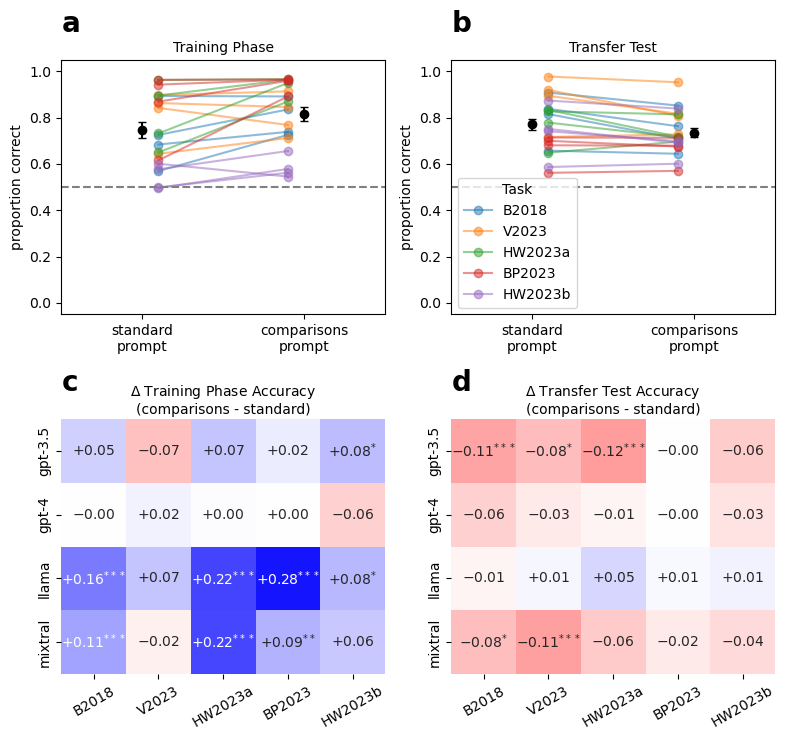

In [30]:
fig, axs = plt.subplots(2, 2, figsize=(8, 7.5))

task_names = ("B2018", "V2023", "HW2023a", "BP2023", "HW2023b")

task_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

# learning phase accuracy (standard vs. comparisons)
colors = [c for c in task_colors for i in range(4)]
for i in range(20):
    y = np.array([standard_learning_acc[i], comparisons_learning_acc[i]])
    x = np.array([0.1, 0.9])
    axs[0,0].plot(x, y, c=colors[i], marker='o', alpha=0.5)
    
axs[0,0].set_ylim((-.05,1.05))
axs[0,0].axhline(y=0.5, linestyle='--', c='grey')
axs[0,0].set_xlim((-0.5, 1.5))
axs[0,0].set_xticks(ticks=[0, 1], labels=['standard\nprompt', 'comparisons\nprompt'])
axs[0,0].set_ylabel('proportion correct')
axs[0,0].set_title('a', fontsize=20, fontweight='bold', loc='left', pad=20)
axs[0,0].text(0.5, 1.1, 'Training Phase', ha='center', va='center')
    
# means
axs[0,0].scatter(0, standard_learning_acc.mean(), marker='o', c='black')
axs[0,0].scatter(1, comparisons_learning_acc.mean(), marker='o', c='black')
   
# standard errors
axs[0,0].errorbar(0, standard_learning_acc.mean(), yerr=standard_learning_acc.std() / np.sqrt(20), capsize=3, c='black')
axs[0,0].errorbar(1, comparisons_learning_acc.mean(), yerr=comparisons_learning_acc.std() / np.sqrt(20), capsize=3, c='black')


# transfer phase accuracy (standard vs. comparisons)
colors = [c for c in task_colors for i in range(4)]
tasks = [task for task in task_names for i in range(4)]
for i in range(20):
    y = np.array([standard_transfer_acc[i], comparisons_transfer_acc[i]])
    x = np.array([0.1, 0.9])
    if i % 4 == 0:
        axs[0,1].plot(x, y, c=colors[i], marker='o', alpha=0.5, label=tasks[i])
    else:
        axs[0,1].plot(x, y, c=colors[i], marker='o', alpha=0.5)
    
axs[0,1].set_ylim((-.05,1.05))
axs[0,1].axhline(y=0.5, linestyle='--', c='grey')
axs[0,1].set_xlim((-0.5, 1.5))
axs[0,1].set_xticks(ticks=[0, 1], labels=['standard\nprompt', 'comparisons\nprompt'])
axs[0,1].set_ylabel('proportion correct')
axs[0,1].set_title('b', fontsize=20, fontweight='bold', loc='left', pad=20)
axs[0,1].text(0.5, 1.1, 'Transfer Test', ha='center', va='center')
axs[0,1].legend(title='Task')
    
# means
axs[0,1].scatter(0, standard_transfer_acc.mean(), marker='o', c='black')
axs[0,1].scatter(1, comparisons_transfer_acc.mean(), marker='o', c='black')
   
# standard errors
axs[0,1].errorbar(0, standard_transfer_acc.mean(), yerr=standard_transfer_acc.std() / np.sqrt(20), capsize=3, c='black')
axs[0,1].errorbar(1, comparisons_transfer_acc.mean(), yerr=comparisons_transfer_acc.std() / np.sqrt(20), capsize=3, c='black')
    
# effect of prompt condition on learning phase accuracy
sns.heatmap(learning_acc_diff, vmin=-0.30, vmax=0.30, center=0, 
            cmap='bwr_r', annot=labels1.T, fmt='', cbar=False, ax=axs[1,0])
axs[1,0].set_title('c', fontsize=20, fontweight='bold', loc='left', pad=20)
axs[1,0].text(2.5, -0.3, r'$\Delta$'+' Training Phase Accuracy\n(comparisons - standard)', ha='center', va='center')
axs[1,0].set_xticks(ticks=[0.5,1.5,2.5,3.5,4.5], labels=['B2018','V2023','HW2023a','BP2023','HW2023b'], rotation=30)
axs[1,0].set_yticks(ticks=[0.5,1.5,2.5,3.5], labels=['gpt-3.5','gpt-4','llama','mixtral'])

# effect of prompt condition on transfer phase accuracy
sns.heatmap(transfer_acc_diff, vmin=-0.30, vmax=0.30, center=0, 
            cmap='bwr_r', annot=labels2.T, fmt='', cbar=False, ax=axs[1,1])
axs[1,1].set_title('d', fontsize=20, fontweight='bold', loc='left', pad=20)
axs[1,1].text(2.5, -0.3, r'$\Delta$'+' Transfer Test Accuracy\n(comparisons - standard)', ha='center', va='center')
axs[1,1].set_xticks(ticks=[0.5,1.5,2.5,3.5,4.5], labels=['B2018','V2023','HW2023a','BP2023','HW2023b'], rotation=30)
axs[1,1].set_yticks(ticks=[0.5,1.5,2.5,3.5], labels=['gpt-3.5','gpt-4','llama','mixtral'])
    
plt.tight_layout()
#plt.savefig('accuracy_by_condition.png', dpi=300)


## 5. Frequency of relative value choices in transfer phase

Subset transfer phase trials where the options have different relative values (removing invalid obs).

In [31]:
df1_transfer_REL = df1.loc[(df1['choice_idx'] != -99) & (df1['context'] == 99) & (df1['target_trial'] == 1)]
df2_transfer_REL = df2.loc[(df2['choice_idx'] != -99) & (df2['context'] == 99) & (df2['target_trial'] == 1)]
df3_transfer_REL = df3.loc[(df3['choice_idx'] != -99) & (df3['context'] == 99) & (df3['target_trial'] == 1)]
# for Bavard & Palminteri (2023) task, only analyze transfer choices where the relative values differ
df4_transfer_REL = df4.loc[(df4['choice_idx'] != -99) & (df4['context'] == 99) & (df4['target_trial_1'] == 1)]
df5_transfer_REL = df5.loc[(df5['choice_idx'] != -99) & (df5['context'] == 99) & (df5['target_trial'] == 1)]

Calculate proportion of relative value choices for each simulation run (w/ model predictions).

In [33]:
df1_pREL = df1_transfer_REL.groupby(['condition', 'model', 'id'])[['chose_REL', 'M7_pREL']].mean()
df2_pREL = df2_transfer_REL.groupby(['condition', 'model', 'id'])[['chose_REL', 'M7_pREL']].mean()
df3_pREL = df3_transfer_REL.groupby(['condition', 'model', 'id'])[['chose_REL', 'M7_pREL']].mean()
df4_pREL = df4_transfer_REL.groupby(['condition', 'model', 'id'])[['chose_REL', 'M7_pREL']].mean()
df5_pREL = df5_transfer_REL.groupby(['condition', 'model', 'id'])[['chose_REL', 'M7_pREL']].mean()

Helper function for plotting data + model fit.

In [40]:
def plot_model_fit(data, ax, chance, ideal, title="", ylabel=False, yticks=True, legend=False, save_as=None):
    LLM_labels = ("gpt-3.5", "gpt-4", "llama", "mixtral")
    LLM_names = ("gpt-35-turbo-0125", "gpt-4-turbo-0125", "llama-2-70b", "mixtral-8x7b")
    condition_names = ("standard prompt", "comparisons prompt")
    x = np.arange(len(LLM_names))  # the label locations
    width = 0.3  # the width of the bars
    multiplier = 0

    cmap = mpl.colormaps['tab20c']
    alphas = {'standard prompt': 0.5, 'comparisons prompt': 1.0}
    legend_labels = {'standard prompt': 'standard', 'comparisons prompt': 'comparisons'}

    for condition in condition_names:
        offset = width * multiplier
        
        means = data.loc[condition].groupby('model').mean()
        stds = data.loc[condition].groupby('model').std()
        ns = data.loc[condition].groupby('model').count()

        ax.bar(x + offset, means['chose_REL'].to_numpy(), width, 
               label=legend_labels[condition], color='darkgray', alpha=alphas[condition])
        
        ax.errorbar(x + offset, means['chose_REL'].to_numpy(),
                    yerr=stds['chose_REL'].to_numpy() / np.sqrt(ns['chose_REL'].to_numpy()),
                    capsize=2, c='black', ls='none')
        
        ax.scatter(x + offset, means['M7_pREL'].to_numpy(), marker='o', color=cmap(4))

        multiplier += 1

    if ylabel: ax.set_ylabel('choice rate')
    ax.set_title(title)
    ax.set_xticks(x + 0.5*width, LLM_labels, rotation=50)
    if not yticks: ax.tick_params(labelleft=False)
    ax.set_ylim((0,1.05))
    if legend: ax.legend(framealpha=1.0, title='prompt')
    ax.axhline(ideal, linestyle='--', c='black')

In [36]:
from matplotlib.lines import Line2D

cmap = mpl.colormaps['tab20c']

legend_elements = [Line2D([0], [0], marker='o', color=cmap(4), ls='none', label='REL-full')]

Create plot.

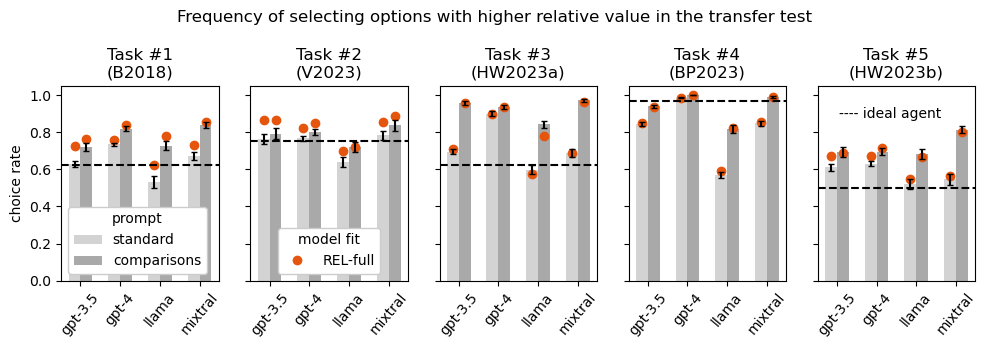

In [41]:
fig, axs = plt.subplots(1, 5, figsize=(10, 3.5))
plot_model_fit(df1_pREL, axs[0], 0.5, 10/16, "Task #1\n(B2018)", ylabel=True, legend=True)
plot_model_fit(df2_pREL, axs[1], 0.5, 6/8, "Task #2\n(V2023)", yticks=False)
plot_model_fit(df3_pREL, axs[2], 0.5, 10/16, "Task #3\n(HW2023a)", yticks=False)
plot_model_fit(df4_pREL, axs[3], 0.5, 31/32, "Task #4\n(BP2023)", yticks=False)
plot_model_fit(df5_pREL, axs[4], 0.5, 8/16, "Task #5\n(HW2023b)", yticks=False)
axs[1].legend(handles=legend_elements, loc='lower center', framealpha=1.0, title='model fit')
axs[4].text(1.5, 0.90, '---- ideal agent', ha='center', va='center')
plt.suptitle('Frequency of selecting options with higher relative value in the transfer test')
plt.tight_layout()
#plt.savefig('model_fit_relative_value_choices.png', dpi=300)

## 6. RL model comparison (BIC)

Models were fit in the order ABS, ABS-2$\beta$, ABS-2$\alpha$, ABS-full, REL, REL-2$\beta$, REL-2$\alpha$, REL-full. 

We will plot them in the order ABS, ABS-2$\alpha$, ABS-2$\beta$, ABS-full, REL, REL-2$\alpha$, REL-2$\beta$, REL-full. 

In [43]:
conditions = ['standard', 'comparisons']
agents = ['gpt-35', 'gpt-4', 'llama', 'mixtral']
model_ids = [0, 2, 1, 3, 4, 6, 5, 7] # ABS, ABS-2α, ABS-2β, ABS-full, REL, REL-2α, REL-2β, REL-full,
n_params = [3, 4, 4, 5, 4, 5, 5, 6]

In [48]:
condition_names = dict(zip(conditions, ['standard prompt', 'comparisons prompt']))
agent_names = dict(zip(agents, ['gpt-3.5-turbo-0125', 'gpt-4-0125-preview', 'llama-2-70b-chat', 'mixtral-8x7b-instruct']))

Collect model fit results.

In [51]:
results1 = {}
results2 = {}
results3 = {}
results4 = {}
results5 = {}

for condition in conditions:
    for agent in agents:
        for model in model_ids:
            
            temp1 = np.load(f"data/Task 1 (B2018)/RL MODELING/{condition}_{agent}_model_{model}_results.npz")
            min_id = temp1['iter_values'].argmin() # index of lowest NLL value across iterations
            NLL = temp1['iter_values'][min_id]
            BIC = 2 * NLL + n_params[model] * np.log(n_valid1[condition_names[condition], agent_names[agent]])
            params = temp1['iter_estimates'][min_id]
            results1[condition, agent, model] = dict(NLL=NLL, BIC=BIC, params=params)
            
            temp2 = np.load(f"data/Task 2 (V2023)/RL MODELING/{condition}_{agent}_model_{model}_results.npz")
            min_id = temp2['iter_values'].argmin()
            NLL = temp2['iter_values'][min_id]
            BIC = 2 * NLL + n_params[model] * np.log(n_valid2[condition_names[condition], agent_names[agent]])
            params = temp2['iter_estimates'][min_id]
            results2[condition, agent, model] = dict(NLL=NLL, BIC=BIC, params=params)
            
            temp3 = np.load(f"data/Task 3 (HW2023a)/RL MODELING/{condition}_{agent}_model_{model}_results.npz")
            min_id = temp3['iter_values'].argmin()
            NLL = temp3['iter_values'][min_id]
            BIC = 2 * NLL + n_params[model] * np.log(n_valid3[condition_names[condition], agent_names[agent]])
            params = temp3['iter_estimates'][min_id]
            results3[condition, agent, model] = dict(NLL=NLL, BIC=BIC, params=params)
            
            temp4 = np.load(f"data/Task 4 (BP2023)/RL MODELING/{condition}_{agent}_model_{model}_results.npz")
            min_id = temp4['iter_values'].argmin()
            NLL = temp4['iter_values'][min_id]
            BIC = 2 * NLL + n_params[model] * np.log(n_valid4[condition_names[condition], agent_names[agent]])
            params = temp4['iter_estimates'][min_id]
            results4[condition, agent, model] = dict(NLL=NLL, BIC=BIC, params=params)
            
            temp5 = np.load(f"data/Task 5 (HW2023b)/RL MODELING/{condition}_{agent}_model_{model}_results.npz")
            min_id = temp5['iter_values'].argmin()
            NLL = temp5['iter_values'][min_id]
            BIC = 2 * NLL + n_params[model] * np.log(n_valid5[condition_names[condition], agent_names[agent]])
            params = temp5['iter_estimates'][min_id]
            results5[condition, agent, model] = dict(NLL=NLL, BIC=BIC, params=params)

Helper function for plotting BICs for each model for a single task.

In [53]:
def plot_BIC(d, plot_title="", save_as=None):
    LLM_names = ("gpt-3.5-turbo-0125", "gpt-4-0125-preview", "llama-2-70b-chat", "mixtral-8x7b-instruct")
    x = np.arange(len(LLM_names))  # the label locations
    width = 0.1  # the width of the bars
    multiplier = 0

    fig, axs = plt.subplots(2, 1, layout='constrained', figsize=(8,5.5))
    #patterns = ['', '\\\\\\\\', '////', 'xxxx', '', '\\\\\\\\', '////', 'xxxx']
    labels = ['ABS','ABS-2β','ABS-2α','ABS-full','REL','REL-2β','REL-2α','REL-full']
    cmap = mpl.colormaps['tab20c']
    cmap_ids = [3, 1, 2, 0, 7, 5, 6, 4]

    for m in model_ids:
        offset = width * multiplier
        col = cmap(cmap_ids[m])

        axs[0].bar(x + offset, [d['standard', agent, m]['BIC'] for agent in agents], 
                   width, label=labels[m], color=col, edgecolor='black')

        axs[1].bar(x + offset, [d['comparisons', agent, m]['BIC'] for agent in agents], 
                   width, label=labels[m], color=col, edgecolor='black')
        multiplier += 1

    axs[0].set_ylabel('BIC')
    axs[0].set_title('\nstandard prompt')
    axs[0].set_xticks(x + 3.5*width, LLM_names)
    axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))

    axs[1].set_ylabel('BIC')
    axs[1].set_title('\ncomparisons prompt')
    axs[1].set_xticks(x + 3.5*width, LLM_names)

    sg35 = np.array([d[('standard', 'gpt-35', m)]['BIC'] for m in model_ids])
    sg4 = np.array([d[('standard', 'gpt-4', m)]['BIC'] for m in model_ids])
    sl = np.array([d[('standard', 'llama', m)]['BIC'] for m in model_ids])
    sm = np.array([d[('standard', 'mixtral', m)]['BIC'] for m in model_ids])
    cg35 = np.array([d[('comparisons', 'gpt-35', m)]['BIC'] for m in model_ids])
    cg4 = np.array([d[('comparisons', 'gpt-4', m)]['BIC'] for m in model_ids])
    cl = np.array([d[('comparisons', 'llama', m)]['BIC'] for m in model_ids])
    cm = np.array([d[('comparisons', 'mixtral', m)]['BIC'] for m in model_ids])

    axs[0].text(0 + sg35.argmin()*width, min(sg35) + 50, '*', ha='center', va='center')
    axs[0].text(1 + sg4.argmin()*width, min(sg4) + 50, '*', ha='center', va='center')
    axs[0].text(2 + sl.argmin()*width, min(sl) + 50, '*', ha='center', va='center')
    axs[0].text(3 + sm.argmin()*width, min(sm) + 50, '*', ha='center', va='center')
    axs[1].text(0 + cg35.argmin()*width, min(cg35) + 50, '*', ha='center', va='center')
    axs[1].text(1 + cg4.argmin()*width, min(cg4) + 50, '*', ha='center', va='center')
    axs[1].text(2 + cl.argmin()*width, min(cl) + 50, '*', ha='center', va='center')
    axs[1].text(3 + cm.argmin()*width, min(cm) + 50, '*', ha='center', va='center')

    plt.suptitle(plot_title)

    #plt.show()
    if save_as is not None:
        plt.savefig(save_as, dpi=200)
    else:
        plt.show()

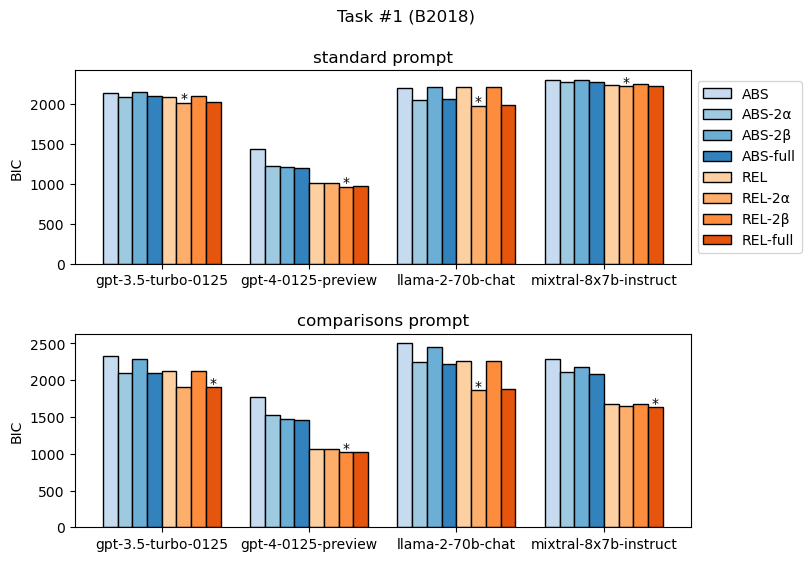

In [55]:
plot_BIC(results1, plot_title='Task #1 (B2018)', save_as='modeling_results_Task1.png')

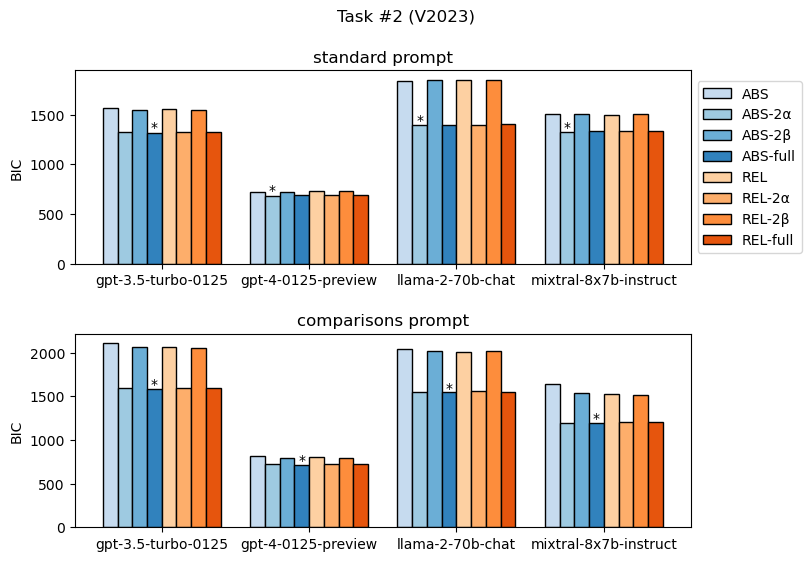

In [56]:
plot_BIC(results2, plot_title='Task #2 (V2023)', save_as='modeling_results_Task2.png')

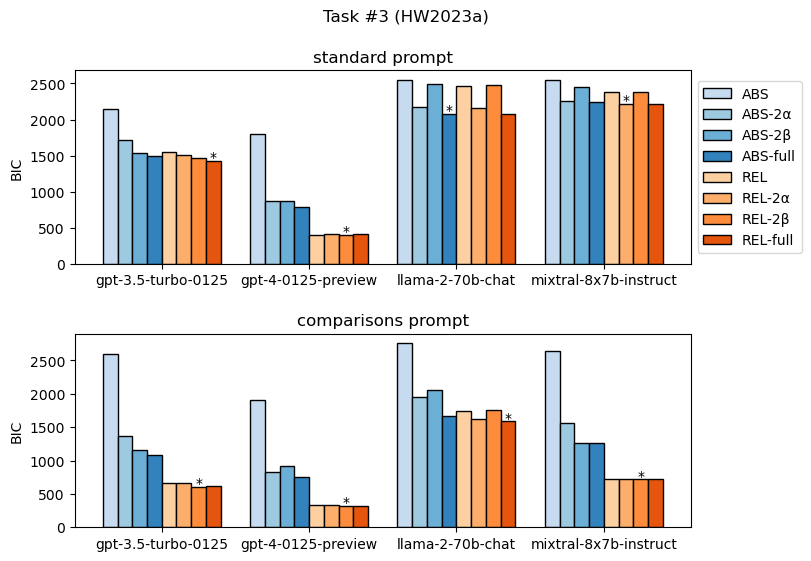

In [57]:
plot_BIC(results3, plot_title='Task #3 (HW2023a)', save_as='modeling_results_Task3.png')

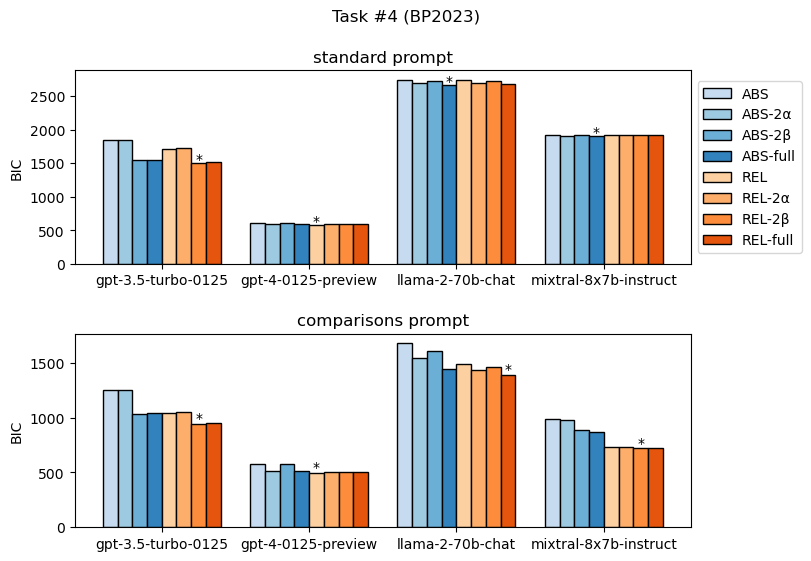

In [58]:
plot_BIC(results4, plot_title='Task #4 (BP2023)', save_as='modeling_results_Task4.png')

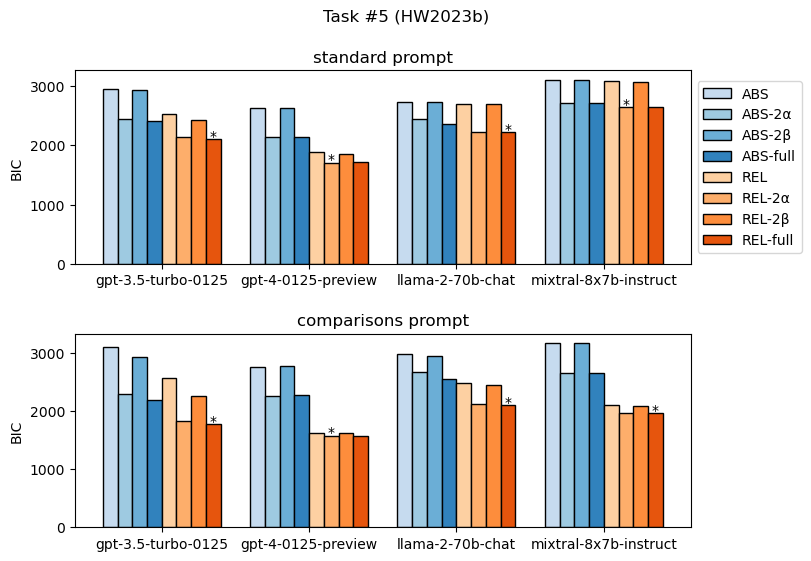

In [59]:
plot_BIC(results5, plot_title='Task #5 (HW2023b)', save_as='modeling_results_Task5.png')

### 6a. Get indices of best-fitting model for each LLM (across tasks and prompt conditions)

In [60]:
gpt35_bestmodel = np.array([
    np.array([results1['standard', 'gpt-35', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results1['comparisons', 'gpt-35', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results2['standard', 'gpt-35', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results2['comparisons', 'gpt-35', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results3['standard', 'gpt-35', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results3['comparisons', 'gpt-35', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results4['standard', 'gpt-35', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results4['comparisons', 'gpt-35', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results5['standard', 'gpt-35', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results5['comparisons', 'gpt-35', m]['BIC'] for m in model_ids]).argmin()
])

gpt4_bestmodel = np.array([
    np.array([results1['standard', 'gpt-4', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results1['comparisons', 'gpt-4', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results2['standard', 'gpt-4', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results2['comparisons', 'gpt-4', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results3['standard', 'gpt-4', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results3['comparisons', 'gpt-4', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results4['standard', 'gpt-4', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results4['comparisons', 'gpt-4', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results5['standard', 'gpt-4', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results5['comparisons', 'gpt-4', m]['BIC'] for m in model_ids]).argmin()
])

llama_bestmodel = np.array([
    np.array([results1['standard', 'llama', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results1['comparisons', 'llama', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results2['standard', 'llama', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results2['comparisons', 'llama', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results3['standard', 'llama', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results3['comparisons', 'llama', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results4['standard', 'llama', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results4['comparisons', 'llama', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results5['standard', 'llama', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results5['comparisons', 'llama', m]['BIC'] for m in model_ids]).argmin()
])

mixtral_bestmodel = np.array([
    np.array([results1['standard', 'mixtral', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results1['comparisons', 'mixtral', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results2['standard', 'mixtral', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results2['comparisons', 'mixtral', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results3['standard', 'mixtral', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results3['comparisons', 'mixtral', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results4['standard', 'mixtral', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results4['comparisons', 'mixtral', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results5['standard', 'mixtral', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results5['comparisons', 'mixtral', m]['BIC'] for m in model_ids]).argmin()
])

Proportion of times each RL model was the best fitting for a particular LLM.

In [61]:
bestmodel_by_LLM = {
    'gpt-35': [sum(gpt35_bestmodel == m) / len(gpt35_bestmodel) for m in range(8)],
    'gpt-4': [sum(gpt4_bestmodel == m) / len(gpt4_bestmodel) for m in range(8)],
    'llama': [sum(llama_bestmodel == m) / len(llama_bestmodel) for m in range(8)],
    'mixtral': [sum(mixtral_bestmodel == m) / len(mixtral_bestmodel) for m in range(8)]
}

In [62]:
bestmodel_by_LLM

{'gpt-35': [0.0, 0.0, 0.0, 0.2, 0.0, 0.1, 0.3, 0.4],
 'gpt-4': [0.0, 0.1, 0.0, 0.1, 0.2, 0.2, 0.4, 0.0],
 'llama': [0.0, 0.1, 0.0, 0.3, 0.0, 0.2, 0.0, 0.4],
 'mixtral': [0.0, 0.1, 0.0, 0.2, 0.0, 0.3, 0.2, 0.2]}

### 6b. Get indices of best-fitting model for each prompt condition (across tasks and LLMs)

In [63]:
standard_bestmodel = np.array([
    np.array([results1['standard', 'gpt-35', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results1['standard', 'gpt-4', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results1['standard', 'llama', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results1['standard', 'mixtral', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results2['standard', 'gpt-35', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results2['standard', 'gpt-4', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results2['standard', 'llama', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results2['standard', 'mixtral', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results3['standard', 'gpt-35', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results3['standard', 'gpt-4', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results3['standard', 'llama', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results3['standard', 'mixtral', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results4['standard', 'gpt-35', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results4['standard', 'gpt-4', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results4['standard', 'llama', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results4['standard', 'mixtral', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results5['standard', 'gpt-35', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results5['standard', 'gpt-4', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results5['standard', 'llama', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results5['standard', 'mixtral', m]['BIC'] for m in model_ids]).argmin(),
])

comparisons_bestmodel = np.array([
    np.array([results1['comparisons', 'gpt-35', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results1['comparisons', 'gpt-4', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results1['comparisons', 'llama', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results1['comparisons', 'mixtral', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results2['comparisons', 'gpt-35', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results2['comparisons', 'gpt-4', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results2['comparisons', 'llama', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results2['comparisons', 'mixtral', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results3['comparisons', 'gpt-35', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results3['comparisons', 'gpt-4', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results3['comparisons', 'llama', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results3['comparisons', 'mixtral', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results4['comparisons', 'gpt-35', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results4['comparisons', 'gpt-4', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results4['comparisons', 'llama', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results4['comparisons', 'mixtral', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results5['comparisons', 'gpt-35', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results5['comparisons', 'gpt-4', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results5['comparisons', 'llama', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results5['comparisons', 'mixtral', m]['BIC'] for m in model_ids]).argmin(),
])

Proportion of times each RL model was the best fitting for each prompt condition.

In [64]:
bestmodel_by_condition = {
    'standard': [sum(standard_bestmodel == m) / len(standard_bestmodel) for m in range(8)],
    'comparisons': [sum(comparisons_bestmodel == m) / len(comparisons_bestmodel) for m in range(8)]
}

In [65]:
bestmodel_by_condition

{'standard': [0.0, 0.15, 0.0, 0.2, 0.05, 0.3, 0.15, 0.15],
 'comparisons': [0.0, 0.0, 0.0, 0.2, 0.05, 0.1, 0.3, 0.35]}

### 6c. Get indices of best-fitting model for each task (across LLMs and prompt conditions)

In [66]:
task1_bestmodel = np.array([
    np.array([results1['standard', 'gpt-35', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results1['comparisons', 'gpt-35', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results1['standard', 'gpt-4', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results1['comparisons', 'gpt-4', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results1['standard', 'llama', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results1['comparisons', 'llama', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results1['standard', 'mixtral', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results1['comparisons', 'mixtral', m]['BIC'] for m in model_ids]).argmin()
])

task2_bestmodel = np.array([
    np.array([results2['standard', 'gpt-35', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results2['comparisons', 'gpt-35', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results2['standard', 'gpt-4', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results2['comparisons', 'gpt-4', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results2['standard', 'llama', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results2['comparisons', 'llama', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results2['standard', 'mixtral', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results2['comparisons', 'mixtral', m]['BIC'] for m in model_ids]).argmin()
])

task3_bestmodel = np.array([
    np.array([results3['standard', 'gpt-35', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results3['comparisons', 'gpt-35', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results3['standard', 'gpt-4', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results3['comparisons', 'gpt-4', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results3['standard', 'llama', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results3['comparisons', 'llama', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results3['standard', 'mixtral', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results3['comparisons', 'mixtral', m]['BIC'] for m in model_ids]).argmin()
])

task4_bestmodel = np.array([
    np.array([results4['standard', 'gpt-35', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results4['comparisons', 'gpt-35', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results4['standard', 'gpt-4', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results4['comparisons', 'gpt-4', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results4['standard', 'llama', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results4['comparisons', 'llama', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results4['standard', 'mixtral', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results4['comparisons', 'mixtral', m]['BIC'] for m in model_ids]).argmin()
])

task5_bestmodel = np.array([
    np.array([results5['standard', 'gpt-35', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results5['comparisons', 'gpt-35', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results5['standard', 'gpt-4', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results5['comparisons', 'gpt-4', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results5['standard', 'llama', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results5['comparisons', 'llama', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results5['standard', 'mixtral', m]['BIC'] for m in model_ids]).argmin(),
    np.array([results5['comparisons', 'mixtral', m]['BIC'] for m in model_ids]).argmin()
])

Proportion of times each RL model was the best fitting for each task.

In [67]:
bestmodel_by_task = {
    'task1': [sum(task1_bestmodel == m) / len(task1_bestmodel) for m in range(8)],
    'task2': [sum(task2_bestmodel == m) / len(task2_bestmodel) for m in range(8)],
    'task3': [sum(task3_bestmodel == m) / len(task3_bestmodel) for m in range(8)],
    'task4': [sum(task4_bestmodel == m) / len(task4_bestmodel) for m in range(8)],
    'task5': [sum(task5_bestmodel == m) / len(task5_bestmodel) for m in range(8)]
}

In [68]:
bestmodel_by_task

{'task1': [0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.25, 0.25],
 'task2': [0.0, 0.375, 0.0, 0.625, 0.0, 0.0, 0.0, 0.0],
 'task3': [0.0, 0.0, 0.0, 0.125, 0.0, 0.125, 0.5, 0.25],
 'task4': [0.0, 0.0, 0.0, 0.25, 0.25, 0.0, 0.375, 0.125],
 'task5': [0.0, 0.0, 0.0, 0.0, 0.0, 0.375, 0.0, 0.625]}

Create plot of model comparison results, broken down by task, prompt condition, and LLM.

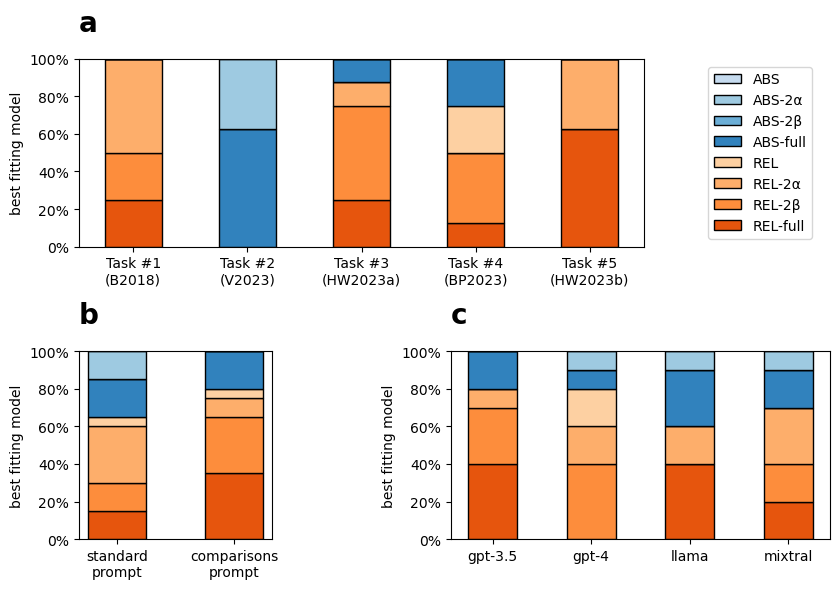

In [74]:
fig = plt.figure(figsize=(8.5, 6))

# Define the layout using subplot2grid
ax1 = plt.subplot2grid((2, 5), (0, 0), colspan=4)  # Centered subplot in the first row
ax2 = plt.subplot2grid((2, 5), (1, 0), colspan=2)  # First subplot in the second row
ax3 = plt.subplot2grid((2, 5), (1, 2), colspan=3)  # Second subplot in the second row

# color map
cmap = mpl.colormaps['tab20c']
cmap_ids = [3, 2, 1, 0, 7, 6, 5, 4]
width = 0.5

patterns = [''] * 8 

model_names = ['ABS','ABS-2α','ABS-2β','ABS-full','REL','REL-2α','REL-2β','REL-full']
task_names = ("Task #1\n(B2018)", "Task #2\n(V2023)", "Task #3\n(HW2023a)", "Task #4\n(BP2023)", "Task #5\n(HW2023b)")
LLM_names = ("gpt-3.5", "gpt-4", "llama", "mixtral")
condition_names = ("standard\nprompt", "comparisons\nprompt")

# top plot (best model x task)
bottom = np.zeros(5)
for model in reversed(model_names):
    idx = model_names.index(model)
    proportions = [p[idx] * 100 for p in bestmodel_by_task.values()]
    col = cmap(cmap_ids[idx])
    ax1.bar(task_names, proportions, width, label=model, bottom=bottom, color=col,
            hatch=patterns[idx], edgecolor='black')
    bottom += proportions
    
handles, labels = ax1.get_legend_handles_labels()

# reverse the order in the legend
ax1.legend(handles[::-1], labels[::-1], loc='center left', bbox_to_anchor=(1.101, 0.5))
ax1.set_yticks(ticks=[0, 20, 40, 60, 80, 100], labels=['0%', '20%', '40%', '60%', '80%', '100%'])
ax1.set_ylabel('best fitting model')
ax1.set_title('a', fontsize=20, fontweight='bold', loc='left', pad=20)
ax1.margins(y=0)


# bottom left plot (best model x prompt condition)
bottom = np.zeros(2)
for model in reversed(model_names):
    idx = model_names.index(model)
    proportions = [p[idx] * 100 for p in bestmodel_by_condition.values()]
    col = cmap(cmap_ids[idx])
    ax2.bar(condition_names, proportions, width, label=model, bottom=bottom, color=col,
            hatch=patterns[idx], edgecolor='black')
    bottom += proportions

ax2.set_yticks(ticks=[0, 20, 40, 60, 80, 100], labels=['0%', '20%', '40%', '60%', '80%', '100%'])
ax2.set_ylabel('best fitting model')
ax2.set_title('b', fontsize=20, fontweight='bold', loc='left', pad=20)
ax2.margins(y=0)


# bottom right plot (best model x LLM)
bottom = np.zeros(4)
for model in reversed(model_names):
    idx = model_names.index(model)
    proportions = [p[idx] * 100 for p in bestmodel_by_LLM.values()]
    col = cmap(cmap_ids[idx])
    ax3.bar(LLM_names, proportions, width, label=model, bottom=bottom, color=col, 
            hatch=patterns[idx], edgecolor='black')
    bottom += proportions

#ax3.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
ax3.set_yticks(ticks=[0, 20, 40, 60, 80, 100], labels=['0%', '20%', '40%', '60%', '80%', '100%'])
#ax3.set_xticks(ticks=[0,1,2,3], labels=LLM_names, rotation=20, ha='right')
ax3.set_ylabel('best fitting model')
ax3.set_title('c', fontsize=20, fontweight='bold', loc='left', pad=20)
ax3.margins(y=0)


plt.tight_layout()
#plt.savefig('model_comparison_aggregate.png', dpi=300)

## 7. RL model parameters

We will analyze parameters of the most complex RL model that we fit (REL-full).

### 7a. Get parameter estimates for each LLM (across prompt conditions and tasks)

In [75]:
gpt35_params = np.stack([
    results1['standard', 'gpt-35', 7]['params'],
    results1['comparisons', 'gpt-35', 7]['params'],
    results2['standard', 'gpt-35', 7]['params'],
    results2['comparisons', 'gpt-35', 7]['params'],
    results3['standard', 'gpt-35', 7]['params'],
    results3['comparisons', 'gpt-35', 7]['params'],
    results4['standard', 'gpt-35', 7]['params'],
    results4['comparisons', 'gpt-35', 7]['params'],
    results5['standard', 'gpt-35', 7]['params'],
    results5['comparisons', 'gpt-35', 7]['params']
])

gpt4_params = np.stack([
    results1['standard', 'gpt-4', 7]['params'],
    results1['comparisons', 'gpt-4', 7]['params'],
    results2['standard', 'gpt-4', 7]['params'],
    results2['comparisons', 'gpt-4', 7]['params'],
    results3['standard', 'gpt-4', 7]['params'],
    results3['comparisons', 'gpt-4', 7]['params'],
    results4['standard', 'gpt-4', 7]['params'],
    results4['comparisons', 'gpt-4', 7]['params'],
    results5['standard', 'gpt-4', 7]['params'],
    results5['comparisons', 'gpt-4', 7]['params']
])

llama_params = np.stack([
    results1['standard', 'llama', 7]['params'],
    results1['comparisons', 'llama', 7]['params'],
    results2['standard', 'llama', 7]['params'],
    results2['comparisons', 'llama', 7]['params'],
    results3['standard', 'llama', 7]['params'],
    results3['comparisons', 'llama', 7]['params'],
    results4['standard', 'llama', 7]['params'],
    results4['comparisons', 'llama', 7]['params'],
    results5['standard', 'llama', 7]['params'],
    results5['comparisons', 'llama', 7]['params']
])

mixtral_params = np.stack([
    results1['standard', 'mixtral', 7]['params'],
    results1['comparisons', 'mixtral', 7]['params'],
    results2['standard', 'mixtral', 7]['params'],
    results2['comparisons', 'mixtral', 7]['params'],
    results3['standard', 'mixtral', 7]['params'],
    results3['comparisons', 'mixtral', 7]['params'],
    results4['standard', 'mixtral', 7]['params'],
    results4['comparisons', 'mixtral', 7]['params'],
    results5['standard', 'mixtral', 7]['params'],
    results5['comparisons', 'mixtral', 7]['params']
])

### 7b. Get parameter estimates for each prompt condition (across tasks and LLMs)

In [76]:
standard_params = np.stack([
    results1['standard', 'gpt-35', 7]['params'],
    results1['standard', 'gpt-4', 7]['params'],
    results1['standard', 'llama', 7]['params'],
    results1['standard', 'mixtral', 7]['params'],
    results2['standard', 'gpt-35', 7]['params'],
    results2['standard', 'gpt-4', 7]['params'],
    results2['standard', 'llama', 7]['params'],
    results2['standard', 'mixtral', 7]['params'],
    results3['standard', 'gpt-35', 7]['params'],
    results3['standard', 'gpt-4', 7]['params'],
    results3['standard', 'llama', 7]['params'],
    results3['standard', 'mixtral', 7]['params'],
    results4['standard', 'gpt-35', 7]['params'],
    results4['standard', 'gpt-4', 7]['params'],
    results4['standard', 'llama', 7]['params'],
    results4['standard', 'mixtral', 7]['params'],
    results5['standard', 'gpt-35', 7]['params'],
    results5['standard', 'gpt-4', 7]['params'],
    results5['standard', 'llama', 7]['params'],
    results5['standard', 'mixtral', 7]['params'],
])

comparisons_params = np.stack([
    results1['comparisons', 'gpt-35', 7]['params'],
    results1['comparisons', 'gpt-4', 7]['params'],
    results1['comparisons', 'llama', 7]['params'],
    results1['comparisons', 'mixtral', 7]['params'],
    results2['comparisons', 'gpt-35', 7]['params'],
    results2['comparisons', 'gpt-4', 7]['params'],
    results2['comparisons', 'llama', 7]['params'],
    results2['comparisons', 'mixtral', 7]['params'],
    results3['comparisons', 'gpt-35', 7]['params'],
    results3['comparisons', 'gpt-4', 7]['params'],
    results3['comparisons', 'llama', 7]['params'],
    results3['comparisons', 'mixtral', 7]['params'],
    results4['comparisons', 'gpt-35', 7]['params'],
    results4['comparisons', 'gpt-4', 7]['params'],
    results4['comparisons', 'llama', 7]['params'],
    results4['comparisons', 'mixtral', 7]['params'],
    results5['comparisons', 'gpt-35', 7]['params'],
    results5['comparisons', 'gpt-4', 7]['params'],
    results5['comparisons', 'llama', 7]['params'],
    results5['comparisons', 'mixtral', 7]['params'],
])

### 7c. Get parameter estimates for each task (across prompt conditions and LLMs)

In [77]:
task1_params = np.array([
    results1['standard', 'gpt-35', 7]['params'],
    results1['comparisons', 'gpt-35', 7]['params'],
    results1['standard', 'gpt-4', 7]['params'],
    results1['comparisons', 'gpt-4', 7]['params'],
    results1['standard', 'llama', 7]['params'],
    results1['comparisons', 'llama', 7]['params'],
    results1['standard', 'mixtral', 7]['params'],
    results1['comparisons', 'mixtral', 7]['params']
])

task2_params = np.array([
    results2['standard', 'gpt-35', 7]['params'],
    results2['comparisons', 'gpt-35', 7]['params'],
    results2['standard', 'gpt-4', 7]['params'],
    results2['comparisons', 'gpt-4', 7]['params'],
    results2['standard', 'llama', 7]['params'],
    results2['comparisons', 'llama', 7]['params'],
    results2['standard', 'mixtral', 7]['params'],
    results2['comparisons', 'mixtral', 7]['params']
])

task3_params = np.array([
    results3['standard', 'gpt-35', 7]['params'],
    results3['comparisons', 'gpt-35', 7]['params'],
    results3['standard', 'gpt-4', 7]['params'],
    results3['comparisons', 'gpt-4', 7]['params'],
    results3['standard', 'llama', 7]['params'],
    results3['comparisons', 'llama', 7]['params'],
    results3['standard', 'mixtral', 7]['params'],
    results3['comparisons', 'mixtral', 7]['params']
])

task4_params = np.array([
    results4['standard', 'gpt-35', 7]['params'],
    results4['comparisons', 'gpt-35', 7]['params'],
    results4['standard', 'gpt-4', 7]['params'],
    results4['comparisons', 'gpt-4', 7]['params'],
    results4['standard', 'llama', 7]['params'],
    results4['comparisons', 'llama', 7]['params'],
    results4['standard', 'mixtral', 7]['params'],
    results4['comparisons', 'mixtral', 7]['params']
])

task5_params = np.array([
    results5['standard', 'gpt-35', 7]['params'],
    results5['comparisons', 'gpt-35', 7]['params'],
    results5['standard', 'gpt-4', 7]['params'],
    results5['comparisons', 'gpt-4', 7]['params'],
    results5['standard', 'llama', 7]['params'],
    results5['comparisons', 'llama', 7]['params'],
    results5['standard', 'mixtral', 7]['params'],
    results5['comparisons', 'mixtral', 7]['params']
])

Plot of main parameter results.

* (A) Relative weighting by task
* (B) Relative weighting by prompt condition
* (C) Relative weighting by LLM
* (D) Learning rates (CON/DIS) by prompt condition

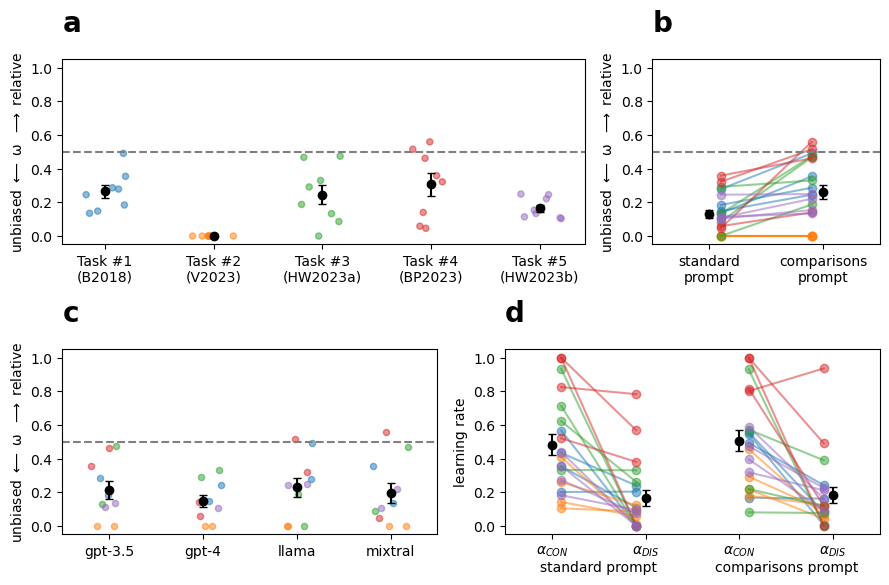

In [80]:
fig = plt.figure(figsize=(9, 6))

task_names = ("Task #1\n(B2018)", "Task #2\n(V2023)", "Task #3\n(HW2023a)", "Task #4\n(BP2023)", "Task #5\n(HW2023b)")

task_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

# Define the layout using subplot2grid
ax1 = plt.subplot2grid((2, 6), (0, 0), colspan=4) 
ax2 = plt.subplot2grid((2, 6), (0, 4), colspan=2)  
ax3 = plt.subplot2grid((2, 6), (1, 0), colspan=3) 
ax4 = plt.subplot2grid((2, 6), (1, 3), colspan=3) 

# (A) Relative weighting by task
for i in range(8):
    y = np.array([task1_params[i,-1], task2_params[i,-1], task3_params[i,-1], task4_params[i,-1], task5_params[i,-1]])
    x_jitter = np.random.uniform(size=5, low=-0.2, high=0.2)
    x = np.arange(len(task_names)) + x_jitter
    ax1.scatter(x, y, c=task_colors, marker='.', s=80, alpha=0.5)

ax1.set_ylim((-.05,1.05))
ax1.axhline(y=0.5, linestyle='--', c='grey')
ax1.set_ylabel(r'unbiased $\longleftarrow$ ω  $\longrightarrow$ relative')
ax1.set_xticks(ticks=np.arange(len(task_names)), labels=task_names)
ax1.set_title('a', fontsize=20, fontweight='bold', loc='left', pad=20)

# means 
x = np.arange(len(task_names))
y = np.array([task1_params[:,-1].mean(), task2_params[:,-1].mean(), 
              task3_params[:,-1].mean(), task4_params[:,-1].mean(), task5_params[:,-1].mean()])
ax1.scatter(x, y, marker='o', c='black')

# standard errors
yerr = np.array([task1_params[:,-1].std(), task2_params[:,-1].std(), 
                 task3_params[:,-1].std(), task4_params[:,-1].std(), task5_params[:,-1].std()]) / np.sqrt(8)
ax1.errorbar(x, y, yerr=yerr, capsize=3, c='black', linestyle='')

# (B) Relative  by prompt condition
colors = [c for c in task_colors for i in range(4)]
for i in range(20):
    y = np.array([standard_params[i,-1], comparisons_params[i,-1]])
    x = np.array([0.1, 0.9])
    ax2.plot(x, y, c=colors[i], marker='o', alpha=0.5)
    
ax2.set_ylim((-.05,1.05))
ax2.axhline(y=0.5, linestyle='--', c='grey')
ax2.set_xlim((-0.5, 1.5))
ax2.set_xticks(ticks=[0, 1], labels=['standard\nprompt', 'comparisons\nprompt'])
ax2.set_ylabel(r'unbiased $\longleftarrow$ ω  $\longrightarrow$ relative')
ax2.set_title('b', fontsize=20, fontweight='bold', loc='left', pad=20)
    
# means
ax2.scatter(0, standard_params[:,-1].mean(), marker='o', c='black')
ax2.scatter(1, comparisons_params[:,-1].mean(), marker='o', c='black')

# standard errors
ax2.errorbar(0, standard_params[:,-1].mean(), yerr=standard_params[:,-1].std() / np.sqrt(20), capsize=3, c='black')
ax2.errorbar(1, comparisons_params[:,-1].mean(), yerr=comparisons_params[:,-1].std() / np.sqrt(20), capsize=3, c='black')


# (C) Relative weighting by LLM
LLM_names = ("gpt-3.5", "gpt-4", "llama", "mixtral")
colors = [c for c in task_colors for i in range(2)]
for i in range(10):
    y = np.array([gpt35_params[i,-1], gpt4_params[i,-1], llama_params[i,-1], mixtral_params[i,-1]])
    x_jitter = np.random.uniform(size=4, low=-0.2, high=0.2)
    x = np.arange(len(LLM_names)) + x_jitter
    ax3.scatter(x, y, c=colors[i], marker='.', s=80, alpha=0.5)
    
ax3.set_ylim((-.05,1.05))
ax3.axhline(y=0.5, linestyle='--', c='grey')
ax3.set_xlim((-0.5, 3.5))
ax3.set_xticks(ticks=np.arange(len(LLM_names)), labels=LLM_names)
ax3.set_ylabel(r'unbiased $\longleftarrow$ ω  $\longrightarrow$ relative')
ax3.set_title('c', fontsize=20, fontweight='bold', loc='left', pad=20)

# means 
x = np.arange(len(LLM_names))
y = np.array([gpt35_params[:,-1].mean(), gpt4_params[:,-1].mean(), 
              llama_params[:,-1].mean(), mixtral_params[:,-1].mean()])
ax3.scatter(x, y, marker='o', c='black')

# standard errors
yerr = np.array([gpt35_params[:,-1].std(), gpt4_params[:,-1].std(), 
              llama_params[:,-1].std(), mixtral_params[:,-1].std()]) / np.sqrt(10)
ax3.errorbar(x, y, yerr=yerr, capsize=3, c='black', linestyle='')

# (D) Learning rates by prompt condition
colors = [c for c in task_colors for i in range(4)]
for i in range(20):
    # CON / DIS in standard prompt condition
    y = np.array([standard_params[i,0], standard_params[i,1]])
    x = np.array([0.1, 0.9])
    ax4.plot(x, y, c=colors[i], marker='o', alpha=0.5)
    # CON / DIS in comparisons prompt condition
    y = np.array([comparisons_params[i,0], comparisons_params[i,1]])
    x = np.array([2.1, 2.9])
    ax4.plot(x, y, c=colors[i], marker='o', alpha=0.5)
    
ax4.set_ylim((-.05,1.05))
ax4.set_xlim((-0.5, 3.5))
ax4.set_xticks(ticks=[0, 1, 2, 3], 
               labels=[r'$\alpha_{CON}$', r'$\alpha_{DIS}$', r'$\alpha_{CON}$', r'$\alpha_{DIS}$'])
ax4.set_ylabel('learning rate')
ax4.set_title('d', fontsize=20, fontweight='bold', loc='left', pad=20)
ax4.text(0.5, -0.25, 'standard prompt', ha='center', va='center')
ax4.text(2.5, -0.25, 'comparisons prompt', ha='center', va='center')

# means 
x = np.arange(4)
y = np.array([standard_params[:,0].mean(), standard_params[:,1].mean(), 
              comparisons_params[:,0].mean(), comparisons_params[:,1].mean()])
ax4.scatter(x, y, marker='o', c='black')

# standard errors
yerr = np.array([standard_params[:,0].std(), standard_params[:,1].std(), 
                 comparisons_params[:,0].std(), comparisons_params[:,1].std()]) / np.sqrt(20)
ax4.errorbar(x, y, yerr=yerr, capsize=3, c='black', linestyle='')


plt.tight_layout()
plt.savefig('relative_weighting.png', dpi=300)


Plot of all model parameters by LLM.

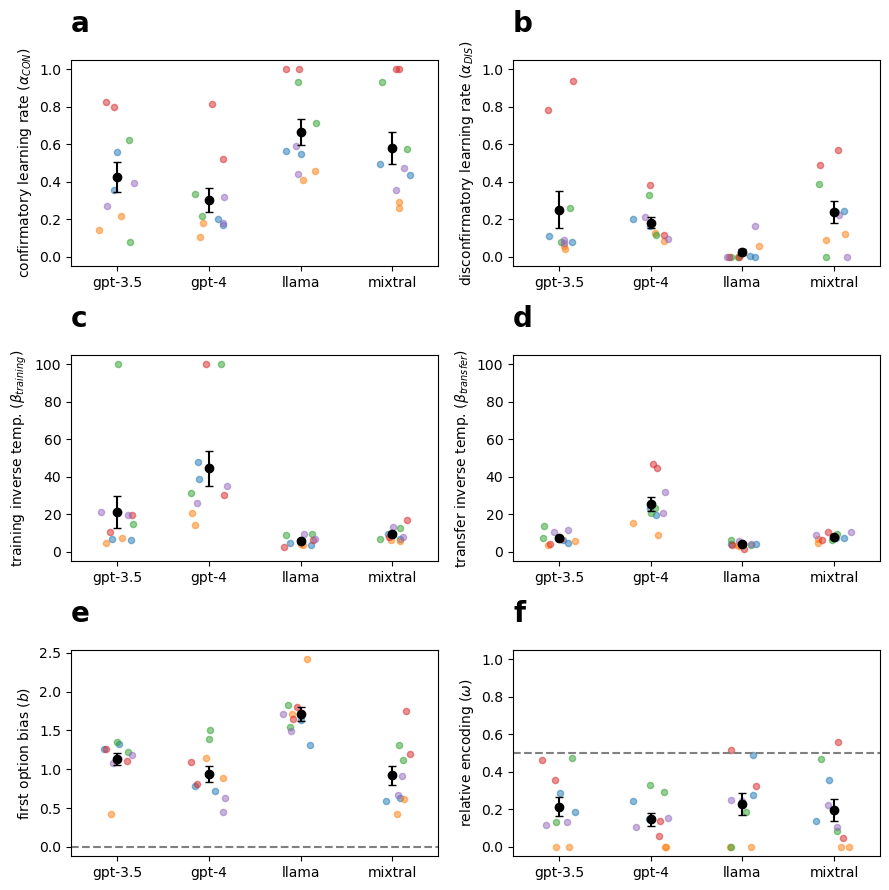

In [89]:
fig, axs = plt.subplots(3, 2, figsize=(9, 9))

LLM_names = ("gpt-3.5", "gpt-4", "llama", "mixtral")

task_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
colors = [c for c in task_colors for i in range(2)]

# (A) CON learning rate
for i in range(10):
    y = np.array([gpt35_params[i,0], gpt4_params[i,0], llama_params[i,0], mixtral_params[i,0]])
    x_jitter = np.random.uniform(size=4, low=-0.2, high=0.2)
    x = np.arange(len(LLM_names)) + x_jitter
    axs[0,0].scatter(x, y, c=colors[i], marker='.', s=80, alpha=0.5)
    
axs[0,0].set_ylim((-.05,1.05))
axs[0,0].set_xlim((-0.5, 3.5))
axs[0,0].set_xticks(ticks=np.arange(len(LLM_names)), labels=LLM_names)
axs[0,0].set_ylabel(r'confirmatory learning rate ($\alpha_{CON}$)')
axs[0,0].set_title('a', fontsize=20, fontweight='bold', loc='left', pad=20)

# means 
x = np.arange(len(LLM_names))
y = np.array([gpt35_params[:,0].mean(), gpt4_params[:,0].mean(), 
              llama_params[:,0].mean(), mixtral_params[:,0].mean()])
axs[0,0].scatter(x, y, marker='o', c='black')

# standard errors
yerr = np.array([gpt35_params[:,0].std(), gpt4_params[:,0].std(), 
              llama_params[:,0].std(), mixtral_params[:,0].std()]) / np.sqrt(10)
axs[0,0].errorbar(x, y, yerr=yerr, capsize=3, c='black', linestyle='')


# (B) DIS learning rate
for i in range(10):
    y = np.array([gpt35_params[i,1], gpt4_params[i,1], llama_params[i,1], mixtral_params[i,1]])
    x_jitter = np.random.uniform(size=4, low=-0.2, high=0.2)
    x = np.arange(len(LLM_names)) + x_jitter
    axs[0,1].scatter(x, y, c=colors[i], marker='.', s=80, alpha=0.5)
    
axs[0,1].set_ylim((-.05,1.05))
axs[0,1].set_xlim((-0.5, 3.5))
axs[0,1].set_xticks(ticks=np.arange(len(LLM_names)), labels=LLM_names)
axs[0,1].set_ylabel(r'disconfirmatory learning rate ($\alpha_{DIS}$)')
axs[0,1].set_title('b', fontsize=20, fontweight='bold', loc='left', pad=20)

# means 
x = np.arange(len(LLM_names))
y = np.array([gpt35_params[:,1].mean(), gpt4_params[:,1].mean(), 
              llama_params[:,1].mean(), mixtral_params[:,1].mean()])
axs[0,1].scatter(x, y, marker='o', c='black')

# standard errors
yerr = np.array([gpt35_params[:,1].std(), gpt4_params[:,1].std(), 
              llama_params[:,1].std(), mixtral_params[:,1].std()]) / np.sqrt(10)
axs[0,1].errorbar(x, y, yerr=yerr, capsize=3, c='black', linestyle='')


# (C) training phase inverse temperature
for i in range(10):
    y = np.array([gpt35_params[i,2], gpt4_params[i,2], llama_params[i,2], mixtral_params[i,2]])
    x_jitter = np.random.uniform(size=4, low=-0.2, high=0.2)
    x = np.arange(len(LLM_names)) + x_jitter
    axs[1,0].scatter(x, y, c=colors[i], marker='.', s=80, alpha=0.5)
    
axs[1,0].set_ylim((-5,105))
axs[1,0].set_xlim((-0.5, 3.5))
axs[1,0].set_xticks(ticks=np.arange(len(LLM_names)), labels=LLM_names)
axs[1,0].set_ylabel(r'training inverse temp. ($\beta_{training}$)')
axs[1,0].set_title('c', fontsize=20, fontweight='bold', loc='left', pad=20)

# means 
x = np.arange(len(LLM_names))
y = np.array([gpt35_params[:,2].mean(), gpt4_params[:,2].mean(), 
              llama_params[:,2].mean(), mixtral_params[:,2].mean()])
axs[1,0].scatter(x, y, marker='o', c='black')

# standard errors
yerr = np.array([gpt35_params[:,2].std(), gpt4_params[:,2].std(), 
              llama_params[:,2].std(), mixtral_params[:,2].std()]) / np.sqrt(10)
axs[1,0].errorbar(x, y, yerr=yerr, capsize=3, c='black', linestyle='')


# (D) transfer test inverse temperature
for i in range(10):
    y = np.array([gpt35_params[i,3], gpt4_params[i,3], llama_params[i,3], mixtral_params[i,3]])
    x_jitter = np.random.uniform(size=4, low=-0.2, high=0.2)
    x = np.arange(len(LLM_names)) + x_jitter
    axs[1,1].scatter(x, y, c=colors[i], marker='.', s=80, alpha=0.5)
    
axs[1,1].set_ylim((-5,105))
axs[1,1].set_xlim((-0.5, 3.5))
axs[1,1].set_xticks(ticks=np.arange(len(LLM_names)), labels=LLM_names)
axs[1,1].set_ylabel(r'transfer inverse temp. ($\beta_{transfer}$)')
axs[1,1].set_title('d', fontsize=20, fontweight='bold', loc='left', pad=20)

# means 
x = np.arange(len(LLM_names))
y = np.array([gpt35_params[:,3].mean(), gpt4_params[:,3].mean(), 
              llama_params[:,3].mean(), mixtral_params[:,3].mean()])
axs[1,1].scatter(x, y, marker='o', c='black')

# standard errors
yerr = np.array([gpt35_params[:,3].std(), gpt4_params[:,3].std(), 
              llama_params[:,3].std(), mixtral_params[:,3].std()]) / np.sqrt(10)
axs[1,1].errorbar(x, y, yerr=yerr, capsize=3, c='black', linestyle='')


# (E) first option bias
for i in range(10):
    y = np.array([gpt35_params[i,4], gpt4_params[i,4], llama_params[i,4], mixtral_params[i,4]])
    x_jitter = np.random.uniform(size=4, low=-0.2, high=0.2)
    x = np.arange(len(LLM_names)) + x_jitter
    axs[2,0].scatter(x, y, c=colors[i], marker='.', s=80, alpha=0.5)
    
axs[2,0].axhline(y=0., linestyle='--', c='grey')
axs[2,0].set_xlim((-0.5, 3.5))
axs[2,0].set_xticks(ticks=np.arange(len(LLM_names)), labels=LLM_names)
axs[2,0].set_ylabel(r'first option bias ($b$)')
axs[2,0].set_title('e', fontsize=20, fontweight='bold', loc='left', pad=20)

# means 
x = np.arange(len(LLM_names))
y = np.array([gpt35_params[:,4].mean(), gpt4_params[:,4].mean(), 
              llama_params[:,4].mean(), mixtral_params[:,4].mean()])
axs[2,0].scatter(x, y, marker='o', c='black')

# standard errors
yerr = np.array([gpt35_params[:,4].std(), gpt4_params[:,4].std(), 
              llama_params[:,4].std(), mixtral_params[:,4].std()]) / np.sqrt(10)
axs[2,0].errorbar(x, y, yerr=yerr, capsize=3, c='black', linestyle='')


# (F) relative encoding 
for i in range(10):
    y = np.array([gpt35_params[i,5], gpt4_params[i,5], llama_params[i,5], mixtral_params[i,5]])
    x_jitter = np.random.uniform(size=4, low=-0.2, high=0.2)
    x = np.arange(len(LLM_names)) + x_jitter
    axs[2,1].scatter(x, y, c=colors[i], marker='.', s=80, alpha=0.5)
    
axs[2,1].axhline(y=0.5, linestyle='--', c='grey')
axs[2,1].set_ylim((-.05,1.05))
axs[2,1].set_xlim((-0.5, 3.5))
axs[2,1].set_xticks(ticks=np.arange(len(LLM_names)), labels=LLM_names)
axs[2,1].set_ylabel(r'relative encoding ($\omega$)')
axs[2,1].set_title('f', fontsize=20, fontweight='bold', loc='left', pad=20)

# means 
x = np.arange(len(LLM_names))
y = np.array([gpt35_params[:,5].mean(), gpt4_params[:,5].mean(), 
              llama_params[:,5].mean(), mixtral_params[:,5].mean()])
axs[2,1].scatter(x, y, marker='o', c='black')

# standard errors
yerr = np.array([gpt35_params[:,5].std(), gpt4_params[:,5].std(), 
              llama_params[:,5].std(), mixtral_params[:,5].std()]) / np.sqrt(10)
axs[2,1].errorbar(x, y, yerr=yerr, capsize=3, c='black', linestyle='')




plt.tight_layout()
#plt.savefig('model parameters.png', dpi=300)